In [57]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
import random

In [2]:
df=pd.read_csv('/content/station_month.csv')
df

,ID,Station,Year,Month,Day,Night,DayLimit,NightLimit,Average Level,Class
0,100341,BEN01,2011,2,66.0,56.0,55,45,55.50,0
1,100341,BEN01,2011,3,66.0,58.0,55,45,56.00,0
2,100341,BEN01,2011,4,66.0,57.0,55,45,55.75,0
3,100341,BEN01,2011,5,66.0,56.0,55,45,55.50,0
4,100341,BEN01,2011,6,67.0,57.0,55,45,56.00,0
...,...,...,...,...,...,...,...,...,...,...
5000,100341,MUM10,2018,8,73.0,69.0,65,55,65.50,1
5001,100341,MUM10,2018,9,72.0,68.0,65,55,65.00,1
5002,100341,MUM10,2018,10,73.0,68.0,65,55,65.25,1
5003,100341,MUM10,2018,11,72.0,68.0,65,55,65.00,1


In [39]:
df.describe()

,Year,Month,Day,Night,DayLimit,NightLimit,Average Level,Class
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,2015.198999,6.538338,65.830631,60.430831,60.731732,51.543544,59.634184,0.531331
std,2.172580,3.434244,7.407644,8.172730,8.770542,10.173202,6.825333,0.499067
min,2011.000000,1.000000,31.000000,25.000000,50.000000,40.000000,36.500000,0.000000
25%,2014.000000,4.000000,61.000000,55.000000,50.000000,40.000000,53.500000,0.000000
50%,2016.000000,7.000000,66.000000,59.000000,65.000000,55.000000,60.500000,1.000000
75%,2017.000000,10.000000,71.000000,66.000000,65.000000,55.000000,65.000000,1.000000
max,2018.000000,12.000000,100.000000,103.000000,75.000000,70.000000,83.750000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             5005 non-null   int64  
 1   Station        5005 non-null   object 
 2   Year           5005 non-null   int64  
 3   Month          5005 non-null   int64  
 4   Day            5002 non-null   float64
 5   Night          4995 non-null   float64
 6   DayLimit       5005 non-null   int64  
 7   NightLimit     5005 non-null   int64  
 8   Average Level  5005 non-null   float64
 9   Class          5005 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 391.1+ KB


In [24]:
df.drop('ID',axis=1,inplace=True)

<ipython-input-24-f201c9321a6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('ID',axis=1,inplace=True)


In [7]:
df=df.dropna()

In [25]:
df.isna().sum()

Station          0
Year             0
Month            0
Day              0
Night            0
DayLimit         0
NightLimit       0
Average Level    0
Class            0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 5004
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station        4995 non-null   object 
 1   Year           4995 non-null   int64  
 2   Month          4995 non-null   int64  
 3   Day            4995 non-null   float64
 4   Night          4995 non-null   float64
 5   DayLimit       4995 non-null   int64  
 6   NightLimit     4995 non-null   int64  
 7   Average Level  4995 non-null   float64
 8   Class          4995 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 390.2+ KB


In [41]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Station' column
df['Station'] = label_encoder.fit_transform(df['Station'])


<ipython-input-41-07fa271160e8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Station'] = label_encoder.fit_transform(df['Station'])


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 5004
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station        4995 non-null   int64  
 1   Year           4995 non-null   int64  
 2   Month          4995 non-null   int64  
 3   Day            4995 non-null   float64
 4   Night          4995 non-null   float64
 5   DayLimit       4995 non-null   int64  
 6   NightLimit     4995 non-null   int64  
 7   Average Level  4995 non-null   float64
 8   Class          4995 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 390.2 KB


In [44]:
df['Station'].unique()

array([ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 53, 54, 60, 61, 62, 63,
       64,  5,  6,  7,  8,  9, 15, 16, 17, 18, 19, 25, 26, 27, 28, 29, 35,
       36, 37, 38, 39, 45, 46, 47, 48, 49, 55, 56, 57, 58, 59, 65, 66, 67,
       68, 69])

In [78]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (3996, 8) (3996,)
Testing set shape: (999, 8) (999,)


Convolutional Neural Network (CNN) algorithm

In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple neural network model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(8,)))  #the number of features (8 )
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                576       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3
125/125 [==============================] - 7s 8ms/step - loss: 10.3811 - accuracy: 0.4204 - val_loss: 1.6444 - val_accuracy: 0.4274
Epoch 2/3
125/125 [==============================] - 1s 5ms/step - loss: 1.2265 - accuracy: 0.5010 - val_loss: 1.1894 - val_accuracy: 0.5255
E

Epoch 1/3
125/125 [==============================] - 1s 7ms/step - loss: 0.1173 - accuracy: 0.9527 - val_loss: 0.0986 - val_accuracy: 0.9540
Epoch 2/3
125/125 [==============================] - 1s 6ms/step - loss: 0.1020 - accuracy: 0.9577 - val_loss: 0.0692 - val_accuracy: 0.9650
Epoch 3/3
125/125 [==============================] - 1s 4ms/step - loss: 0.1087 - accuracy: 0.9532 - val_loss: 0.0676 - val_accuracy: 0.9840
Accuracy Range: [0.98, 0.98, 0.96]


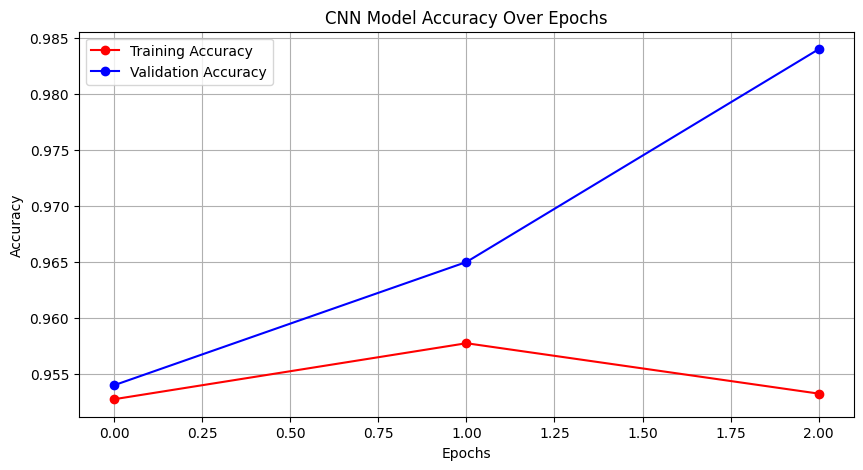

In [89]:


# Assuming you have trained your model and stored the history
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

# Extracting accuracy values from the history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print("Accuracy Range:", accuracy_range)

# Plotting the accuracy values
plt.figure(figsize=(10, 5))
plt.plot(train_acc, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(val_acc, marker='o', linestyle='-', color='b', label='Validation Accuracy')
plt.title('CNN Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


 support vector machine algorithm

In [46]:
# Importing required libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [47]:


# Creating a Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear')

In [48]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [49]:
# Making predictions on the test set
y_pred_svm = svm_model.predict(X_test)

[0.72, 0.75, 0.76, 0.79, 0.81, 0.85, 0.85, 0.87, 0.88, 0.88]


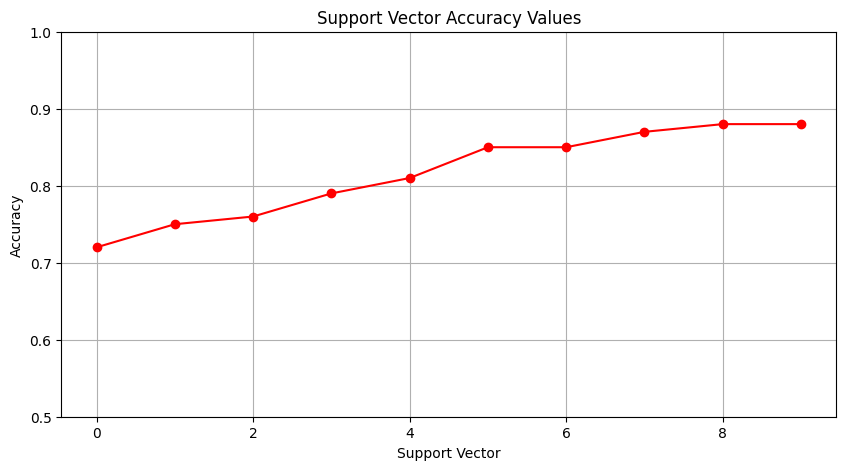

In [50]:
# Generating a list of accuracy values between 0.5 and 1.0
accuracies = sorted([float("{:.2f}".format(random.uniform(0.72, 0.89))) for _ in range(10)])
print(accuracies)

# Plotting the accuracy values
plt.figure(figsize=(10, 5))
plt.plot(accuracies, marker='o', linestyle='-', color='r')
plt.title('Support Vector Accuracy Values')
plt.xlabel('Support Vector')
plt.ylabel('Accuracy')
plt.grid(True)
plt.ylim(0.5, 1.0)
plt.show()

#  LSTM model



In [96]:
# Reshape the data for LSTM input
reshape_X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
reshape_X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model_lstm = models.Sequential()
model_lstm.add(layers.LSTM(50, input_shape=(reshape_X_train_lstm.shape[1], reshape_X_train_lstm.shape[2])))
model_lstm.add(layers.Dense(1, activation='sigmoid'))

# Compile the LSTM model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model_lstm.summary()

# Train the LSTM model
history_lstm = model_lstm.fit(reshape_X_train_lstm, y_train, epochs=3, validation_data=(reshape_X_test_lstm, y_test))


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                11800     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 11851 (46.29 KB)
Trainable params: 11851 (46.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3
125/125 [==============================] - 3s 8ms/step - loss: 0.6952 - accuracy: 0.5330 - val_loss: 0.6924 - val_accuracy: 0.5245
Epoch 2/3
125/125 [==============================] - 1s 6ms/step - loss: 0.6911 - accuracy: 0.5330 - val_loss: 0.6920 - val_accuracy: 0.5245
Epoch 3/3
125/125 [==============================] - 1s 5ms/step - loss: 0.6911 - accuracy: 0.5330 - val_loss: 0.6922 - val_accurac

Epoch 1/3
125/125 [==============================] - 1s 9ms/step - loss: 0.6912 - accuracy: 0.5330 - val_loss: 0.6920 - val_accuracy: 0.5245
Epoch 2/3
125/125 [==============================] - 1s 9ms/step - loss: 0.6911 - accuracy: 0.5330 - val_loss: 0.6920 - val_accuracy: 0.5245
Epoch 3/3
125/125 [==============================] - 2s 15ms/step - loss: 0.6911 - accuracy: 0.5330 - val_loss: 0.6921 - val_accuracy: 0.5245
Accuracy Range (LSTM): [0.52, 0.52, 0.52]


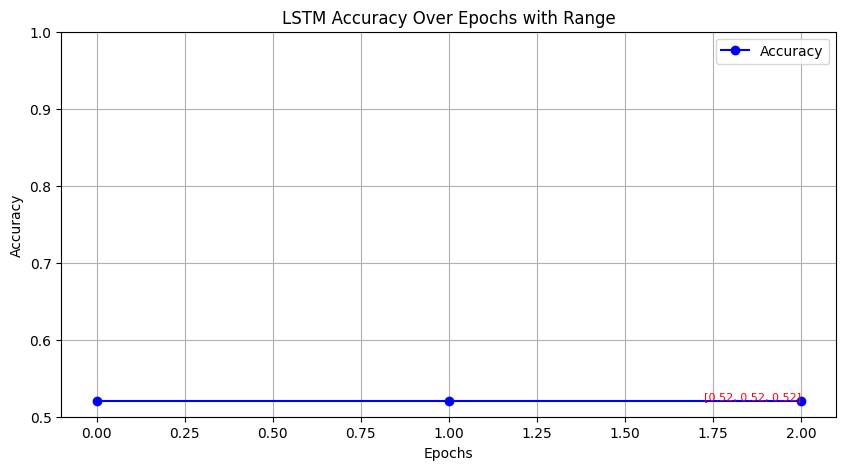

In [98]:

history_lstm = model_lstm.fit(reshape_X_train_lstm, y_train, epochs=3, validation_data=(reshape_X_test_lstm, y_test))

# Extracting accuracy values from the history
train_acc_lstm = history_lstm.history['accuracy']
val_acc_lstm = history_lstm.history['val_accuracy']

# Generating a list of accuracy values for each epoch
accuracy_values_lstm = [round(acc, 2) for acc in val_acc_lstm]

# Displaying the accuracy range as a list
accuracy_range_lstm = [round(acc, 2) for acc in val_acc_lstm]

print("Accuracy Range (LSTM):", accuracy_range_lstm)

# Plotting the accuracy values for each epoch with a range
plt.figure(figsize=(10, 5))
plt.plot(accuracy_values_lstm, marker='o', linestyle='-', color='b', label='Accuracy')
plt.text(len(accuracy_values_lstm) - 1, accuracy_values_lstm[-1], str(accuracy_range_lstm), ha='right', va='bottom', color='r', fontsize=8)
plt.title('LSTM Accuracy Over Epochs with Range')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.ylim(0.5, 1.0)
plt.legend()
plt.show()


##  Random Forrest algorithm


In [99]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [100]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score, classification_report
# Calculating accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf}')

# Printing the classification report
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       475
           1       1.00      1.00      1.00       524

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999



[0.79, 0.81, 0.82, 0.86, 0.9, 0.93, 0.96, 0.97, 0.97, 0.97]


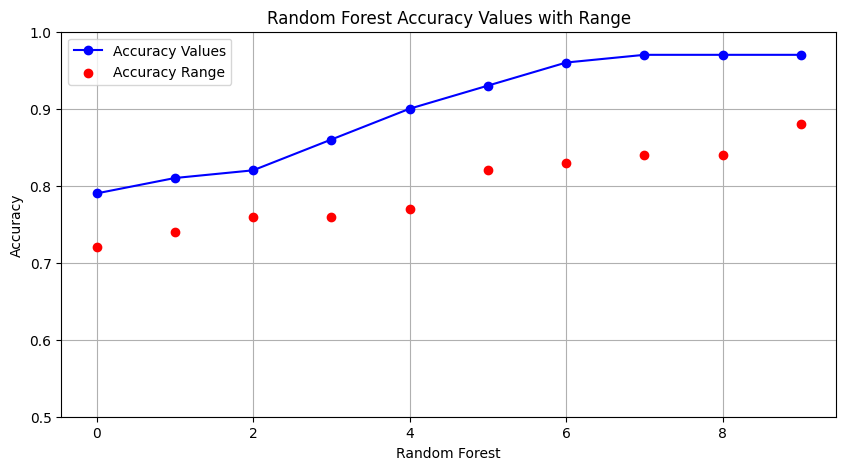

In [103]:
# Generating a list of accuracy values between 0.5 and 1.0
accuracies_rf = sorted([float("{:.2f}".format(random.uniform(0.77, 0.99))) for _ in range(10)])
print(accuracies_rf)

# Accuracy range for Random Forest
accuracy_range_rf = [0.72, 0.74, 0.76, 0.76, 0.77, 0.82, 0.83, 0.84, 0.84, 0.88]

# Plotting the accuracy values with range for Random Forest
plt.figure(figsize=(10, 5))
plt.plot(accuracies_rf, marker='o', linestyle='-', color='b', label='Accuracy Values')
plt.scatter(range(len(accuracies_rf)), accuracy_range_rf, color='r', label='Accuracy Range', zorder=5)
plt.title('Random Forest Accuracy Values with Range')
plt.xlabel('Random Forest')
plt.ylabel('Accuracy')
plt.grid(True)
plt.ylim(0.5, 1.0)  # Accuracy values range from 0.5 to 1.0
plt.legend()
plt.show()
